# Capítulo 03 - Econometria Básica - Gujarati e Porter

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use(['science', 'notebook', 'grid', 'dark_background'])
plt.style.use(['science', 'notebook', 'grid'])

***

## Resumo

- As hipóteses do modelo de regressão linear clássico são:
    - $I.$ O modelo é linear nos parâmetros
    - $II.$ Valores de X fixos (em amostras repetidas) ou independentes do termo de erro $u_i$ ($(cov(X_i, u_i) = 0$)).
    - $III.$ $E(u_i | X_i ) = 0$ ou $E(u_i) = 0$.
    - $IV.$ Homocedasticidade, isto é, $var(u_i) = \sigma^2$, independentemente do valor de $X_i$.
    - $V.$ Não há autocorrelação entre os termos de erro $cov(u_i, u_j) = 0, i \ne j$.
    - $VI.$ O número de observações deve ser maior que o número de parâmetros a serem estimados.
    - $VII.$ Os valores de X em uma amostra não devem ser os mesmos ($var(X) > 0$).

- Estimador ***BLUE*** (best linear unbiased estimator):
    
    - É linear.
    - É não viesado, isto é, $E(\hat{\beta}) = \beta$.
    - É um estimador eficiente, isto é, com variância mínima e não viesado na classe dos estimadores lineares.

    
- Teorema de Gauss-Markov: *Dadas as premissas do modelo clássico de regressão linear, os estimadores de mínimos quadrados (MQO) da classe dos estimadores lineares não viesados têm variância mínima, isto é, são o melhor estimador linear não viesado (MELNT).*

- O coeficiente de determinação $R^2$ é uma medida resumida que diz quanto a linha de regressão amostral ajusta-se aos dados.

***

## Exercício 3.18

In [2]:
from scipy.stats import spearmanr

# Calculando Coeficiente de Correlação de Spearman com SciPy
p1 = np.array([1, 3, 7, 10, 9, 5, 4, 8, 2, 6])
p2 = np.array([3, 2, 8, 7, 9, 6, 5, 10, 1, 4])
print(spearmanr(p1, p2))

# Calculando Coeficiente de Correlação de Spearman com Pandas
cols = ['P1', 'P2']
idx = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

df = pd.DataFrame(data=np.column_stack([p1, p2]), columns=cols, index=idx)
print(df.corr(method='spearman'))

SpearmanrResult(correlation=0.8424242424242423, pvalue=0.0022200312259168407)
          P1        P2
P1  1.000000  0.842424
P2  0.842424  1.000000


- Há um alto grau de correlação entre as notas da primeira prova e as notas da prova final, ou seja, quanto mais alta a nota da primeira prova, mais alta a nota da prova final.

## Exercício 3.19

- Y = taxa de câmbio de dólar canadense em relação ao dólar americano (DC/$).

- X = razão do IPC americano pelo IPC canadense, isto é, os preços relativos dos dois países.

- Resultados da Regressão:
    - $\hat{Y_t} = 0.912 + 2.250 X_t$
    - $r^2 = 0.440$
    - $\sigma = 0.096$
    
A regressão acima nos diz que a taxa de câmbio (C\\$/USD) depreciou cerca de 2.25 unidades para cada unidade de aumento no preço relativo entre os dois países ( $\frac{\text{IPC}_{USA}}{\text{IPC}_{CND}}$). Segundo a teoria da paridade de poder de compra, o valor positivo do coeficiente não faz sentido econômico. *"A teoria PPC, portanto, prevê que uma queda no poder de compra nacional da moeda (como indicado por um aumento no nível de preço nacional) será associada com uma depreciação proporcional da moeda no mercado cambial estrangeiro"* (Economia Internacional; Krugman, Obstfeld e Melitz). Portanto, o fato de um aumento no IPC canadense levar a uma depreciação da taxa de câmbio ( $ \downarrow \frac{\text{CND}}{\text{USD}} = \frac{\text{IPC}_{USA}}{\uparrow \text{IPC}_{CND}} $ ) contradiz essa teoria.

## Exercício 3.20

In [3]:
# Lendo e tratando os dados
# TABLE B–49.—Productivity and related data, business sector, 1959–2006
df = pd.read_excel("dados/ERP-2007/ERP-2007-table49.xls", index_col=0, header=[2,3], nrows=52)

df.columns = pd.MultiIndex.from_tuples([(x.upper(), y.upper()) for x, y in df.columns])
# df.columns = ['__'.join(col).strip() for col in df.columns.values]

display(df.head())

OUTPUT PER HOUR OF ALL PERSONS                                  OUTPUT  \
                    BUSINESS SECTOR NONFARM BUSINESS SECTOR BUSINESS SECTOR   
1959                           48.0                    51.3            31.4   
1960                           48.9                    51.9            32.0   
1961                           50.6                    53.5            32.7   
1962                           52.9                    55.9            34.8   
1963                           55.0                    57.8            36.4   

                             HOURS OF ALL PERSONS                          \
     NONFARM BUSINESS SECTOR      BUSINESS SECTOR NONFARM BUSINESS SECTOR   
1959                    31.2                 65.5                    60.9   
1960                    31.8                 65.6                    61.2   
1961                    32.4                 64.6                    60.6   
1962                    34.6                 65.8                    61.9   
1963                    36.2                 66.2                    62.6   

     COMPENSATION PER HOUR                         REAL COMPENSATION PER HOUR  \
           BUSINESS SECTOR NONFARM BUSINESS SECTOR            BUSINESS SECTOR   
1959                  13.3                    13.9                       59.4   
1960                  13.9                    14.5                       60.8   
1961                  14.4                    15.0                       62.5   
1962                  15.1                    15.6                       64.6   
1963                  15.6                    16.1                       66.1   

                             UNIT LABOR COSTS                          \
     NONFARM BUSINESS SECTOR  BUSINESS SECTOR NONFARM BUSINESS SECTOR   
1959                    61.8             27.8                    27.1   
1960                    63.3             28.4                    27.9   
1961                    64.8             28.5                    28.0   
1962                    66.7             28.5                    27.8   
1963                    68.1             28.4                    27.8   

     IMPLICIT PRICE DEFLATOR                          
             BUSINESS SECTOR NONFARM BUSINESS SECTOR  
1959                    26.8                    26.3  
1960                    27.1                    26.6  
1961                    27.3                    26.8  
1962                    27.6                    27.1  
1963                    27.7                    27.3

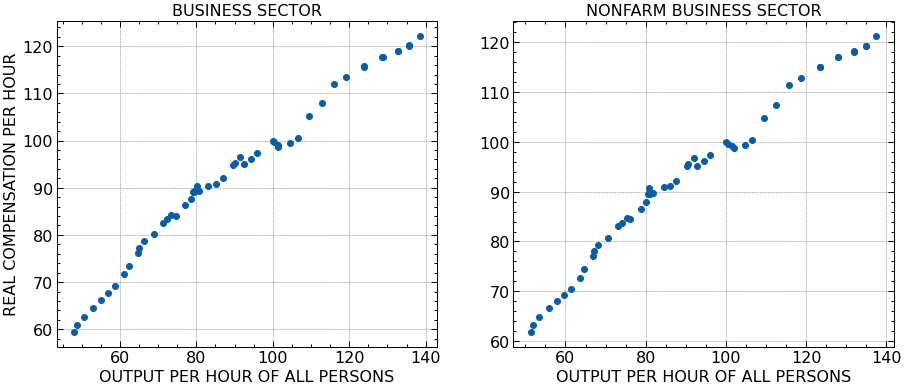

In [4]:
x1 = df['OUTPUT PER HOUR OF ALL PERSONS', 'BUSINESS SECTOR']
x2 = df['OUTPUT PER HOUR OF ALL PERSONS', 'NONFARM BUSINESS SECTOR']
y1 = df['REAL COMPENSATION PER HOUR', 'BUSINESS SECTOR']
y2 = df['REAL COMPENSATION PER HOUR', 'NONFARM BUSINESS SECTOR']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(x1, y1)
axes[0].set_title('BUSINESS SECTOR')
axes[0].set_xlabel('OUTPUT PER HOUR OF ALL PERSONS')
axes[0].set_ylabel('REAL COMPENSATION PER HOUR')

axes[1].scatter(x2, y2)
axes[1].set_title('NONFARM BUSINESS SECTOR')
axes[1].set_xlabel('OUTPUT PER HOUR OF ALL PERSONS')

plt.show()

In [5]:
import statsmodels.api as sm

x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()

print(results.summary())

                                            OLS Regression Results                                           
Dep. Variable:     ('REAL COMPENSATION PER HOUR', 'BUSINESS SECTOR')   R-squared:                       0.980
Model:                                                           OLS   Adj. R-squared:                  0.980
Method:                                                Least Squares   F-statistic:                     2475.
Date:                                               Wed, 25 May 2022   Prob (F-statistic):           2.96e-44
Time:                                                       18:37:58   Log-Likelihood:                -119.89
No. Observations:                                                 52   AIC:                             243.8
Df Residuals:                                                     50   BIC:                             247.7
Df Model:                                                          1                                         
Covariance

## Exercício 3.22

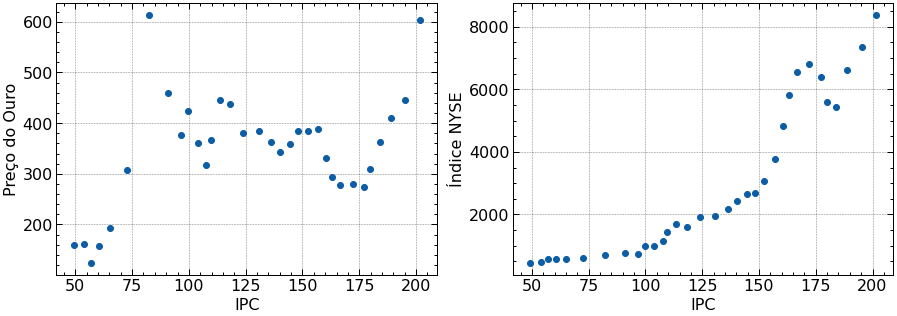

In [6]:
df = pd.read_excel('dados/ouro-nyse.xlsx')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(df['IPC'], df['Preço do Ouro'])
axes[0].set_xlabel('IPC')
axes[0].set_ylabel('Preço do Ouro')

axes[1].scatter(df['IPC'], df['Índice NYSE'])
axes[1].set_xlabel('IPC')
axes[1].set_ylabel('Índice NYSE')

plt.show()

In [7]:
import statsmodels.api as sm

ipc = sm.add_constant(df['IPC'])

model = sm.OLS(df['Preço do Ouro'], ipc)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Preço do Ouro   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.534
Date:                Wed, 25 May 2022   Prob (F-statistic):             0.0157
Time:                        18:37:59   Log-Likelihood:                -198.64
No. Observations:                  33   AIC:                             401.3
Df Residuals:                      31   BIC:                             404.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        216.8937     54.260      3.997      0.0

In [8]:
ipc = sm.add_constant(df['IPC'])

model = sm.OLS(df['Índice NYSE'], ipc)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Índice NYSE   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 25 May 2022   Prob (F-statistic):           7.89e-14
Time:                        18:37:59   Log-Likelihood:                -274.09
No. Observations:                  33   AIC:                             552.2
Df Residuals:                      31   BIC:                             555.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3444.9920    533.966     -6.452      0.0